In [1]:
# Imports 
import os
import sys
sys.path.append("..")
os.environ["pyna_language"] = 'python'
import pdb
import numpy as np
import openmdao.api as om
import pandas as pd
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)
import matplotlib.pyplot as plt
%matplotlib inline
from pyNA.pyna import pyna

from IPython.display import clear_output
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# Load verification trajectory
traj_nasa_std = pd.read_csv('../cases/nasa_stca_standard/trajectory/Trajectory_to.csv')
engine_nasa_std = pd.read_csv('../cases/nasa_stca_standard/engine/Engine_to.csv')

In [19]:
pyna_settings = pyna.load_settings(case_name='stca')
pyna_settings.engine_file_name = 'engine_deck_stca.csv'
pyna_settings.TS_to = 0.88
pyna_settings.TS_vnrs = 0.88

pyna_settings.save_results = False

pyna_settings.TS_cutback = 0.61
pyna_settings.z_cutback = traj_nasa_std['Z [m]'][np.where(traj_nasa_std['TS [-]'] < 0.65)[0][0]]

pyna_settings.max_iter = 100

pyna_settings.PKROT = True

py = pyna(settings=pyna_settings)
py.ac.z_max = traj_nasa_std['Z [m]'].values[-1]
py.ac.v_max = traj_nasa_std['V [m/s]'].values[-1]
py.ac.k_rot = 1.27

py.compute_trajectory(objective='t_end')


--- Linkage Report [phases] ---
    --- groundroll - rotation ---
        time           [final] ==  time           [initial]
        states:x       [final] ==  states:x       [initial]
        states:v       [final] ==  states:v       [initial]
        states:alpha   [final] ==  states:alpha   [initial]
    --- rotation - liftoff ---
        time               [final] ==  time             [initial]
        states:x           [final] ==  states:x         [initial]
        parameters:z       [final*] ==  states:z         [initial]
        states:v           [final] ==  states:v         [initial]
        states:alpha       [final] ==  controls:alpha   [initial]
        parameters:gamma   [final*] ==  states:gamma     [initial]

* : This quantity is fixed or is an input.


--- Constraint Report [phases] ---
    --- groundroll ---
        [final]   0.0000e+00 == flight_dynamics.v_rot_residual [m/s]
    --- rotation ---
        [final]   1.0000e+00 == flight_dynamics.n [None]
    --- liftof

True

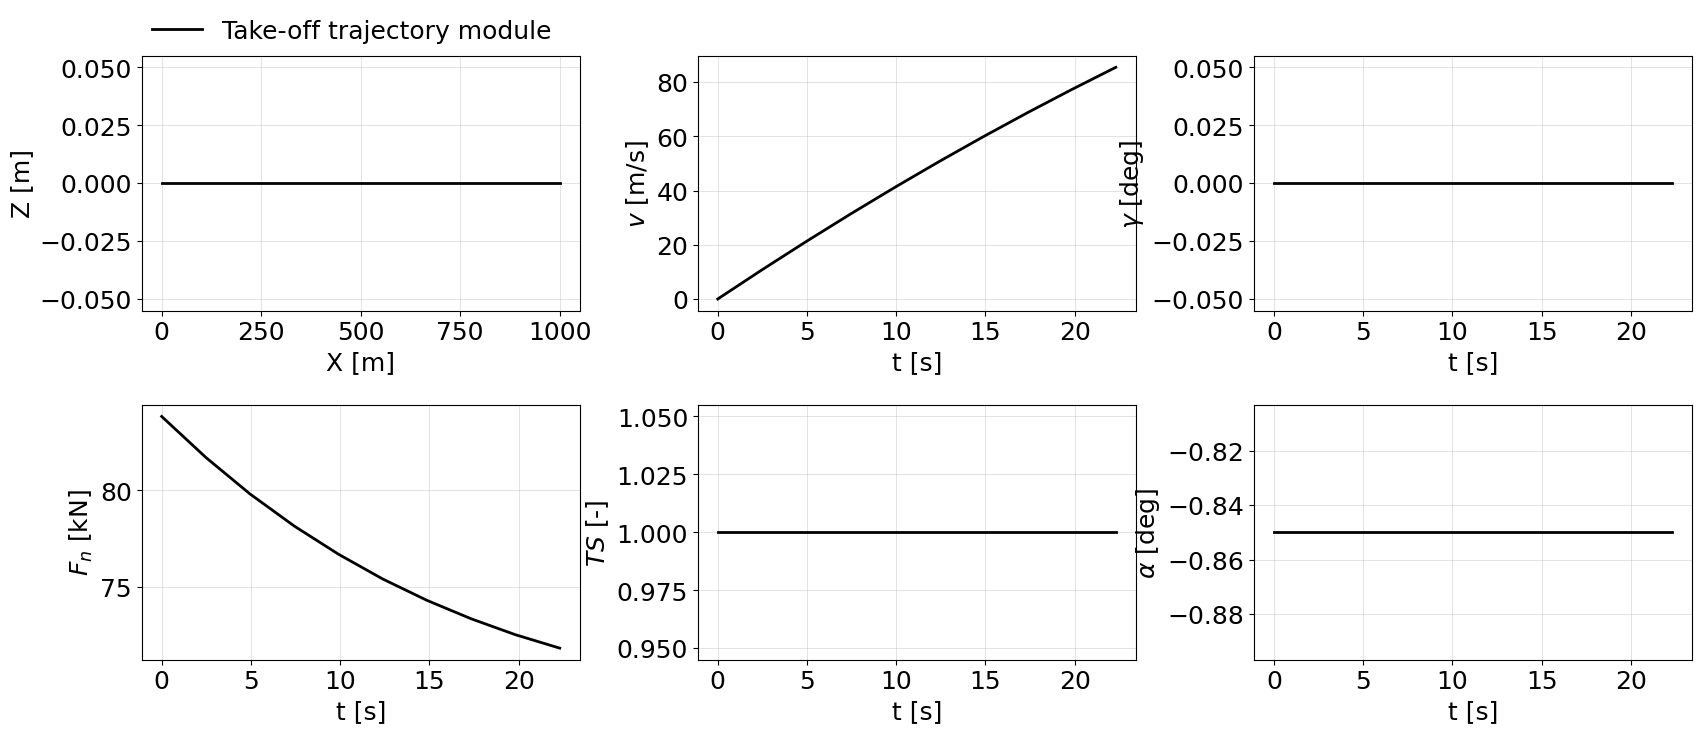

In [17]:
py.plot_trajectory(py.problem)